# Test Grafico

## Cargando Librerias

In [1]:
import scipy.io as sio
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import os

## definiendo rutas 

In [2]:
datasetPath = '../../Datasets/csv/Salinas.csv'
directorio="../../"
directorioModelos=directorio+"modelos2/"
directorioPesos=directorio+"pesos2/"
base="Salinas_"
resolucion=(512,217)

## cargando datos

In [3]:
data  =  pd.read_csv(datasetPath)

## transformando

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### forma del conjunto de datos

In [5]:
print(">>X: ",X.shape)
print(">>y: ",y.shape)

>>X:  (111104, 224)
>>y:  (111104,)


### imprimiendo muestra

(512, 217)


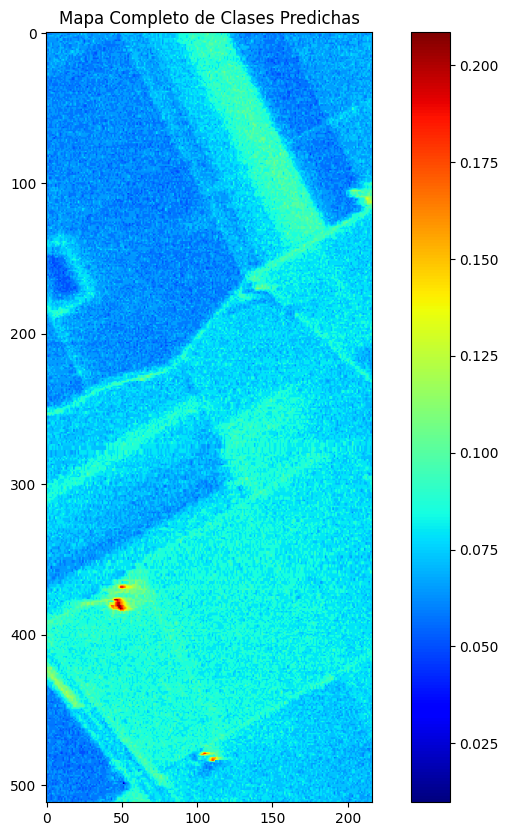

In [6]:
muestra=X[:,2:3]
muestra=muestra.reshape(resolucion)
print(muestra.shape)
plt.figure(figsize=(10, 10))
plt.imshow(muestra, cmap='jet')
plt.colorbar()
plt.title('Mapa Completo de Clases Predichas')
plt.show()

## preprocesado de los datos (YA SE APLICO)

In [7]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

## definiendo modelos a leer

In [8]:
modelos = [
   "C0_TL", "C0_ENN", "C0_OSS", "C0_TL_SMOTE", "C0_ENN_SMOTE", "C0_OSS_SMOTE", "C0_TL_ROS", "C0_ENN_ROS", "C0_OSS_ROS",
]

In [9]:
models=[]
modelosArchivos=[]
for nameModel in modelos:
    modeloArchivo=directorioModelos+base+nameModel+".h5"
    pesoArchivo=directorioPesos+base+nameModel+".weights.h5"
    try:
        print(">>> Cargando modelo: ",modeloArchivo," con los pesos: ",pesoArchivo)  
        model = tf.keras.models.load_model(modeloArchivo)
        print(modeloArchivo," cargado")
        model.load_weights(pesoArchivo)
        print(pesoArchivo," cargado")
        models.append(model)
        modelosArchivos.append(modeloArchivo)    
    except Exception  as error:
        print(">>> Error: ",error)




>>> Cargando modelo:  ../../modelos2/Salinas_C0_TL.h5  con los pesos:  ../../pesos2/Salinas_C0_TL.weights.h5
../../modelos2/Salinas_C0_TL.h5  cargado
../../pesos2/Salinas_C0_TL.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas_C0_ENN.h5  con los pesos:  ../../pesos2/Salinas_C0_ENN.weights.h5
../../modelos2/Salinas_C0_ENN.h5  cargado
../../pesos2/Salinas_C0_ENN.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas_C0_OSS.h5  con los pesos:  ../../pesos2/Salinas_C0_OSS.weights.h5
../../modelos2/Salinas_C0_OSS.h5  cargado
../../pesos2/Salinas_C0_OSS.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas_C0_TL_SMOTE.h5  con los pesos:  ../../pesos2/Salinas_C0_TL_SMOTE.weights.h5
../../modelos2/Salinas_C0_TL_SMOTE.h5  cargado
../../pesos2/Salinas_C0_TL_SMOTE.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas_C0_ENN_SMOTE.h5  con los pesos:  ../../pesos2/Salinas_C0_ENN_SMOTE.weights.h5
../../modelos2/Salinas_C0_ENN_SMOTE.h5  cargado
../../pes

In [10]:
print(models)


[<keras.engine.functional.Functional object at 0x0000022966886830>, <keras.engine.functional.Functional object at 0x000002291D15D9F0>, <keras.engine.functional.Functional object at 0x0000022987859780>, <keras.engine.functional.Functional object at 0x00000229878750F0>, <keras.engine.functional.Functional object at 0x00000229878B4FD0>, <keras.engine.functional.Functional object at 0x0000022987895FF0>, <keras.engine.functional.Functional object at 0x00000229878F8FD0>, <keras.engine.functional.Functional object at 0x0000022987912560>, <keras.engine.functional.Functional object at 0x0000022987912410>]


## Prediccion

3472/3472 [==============================] - 7s 2ms/step


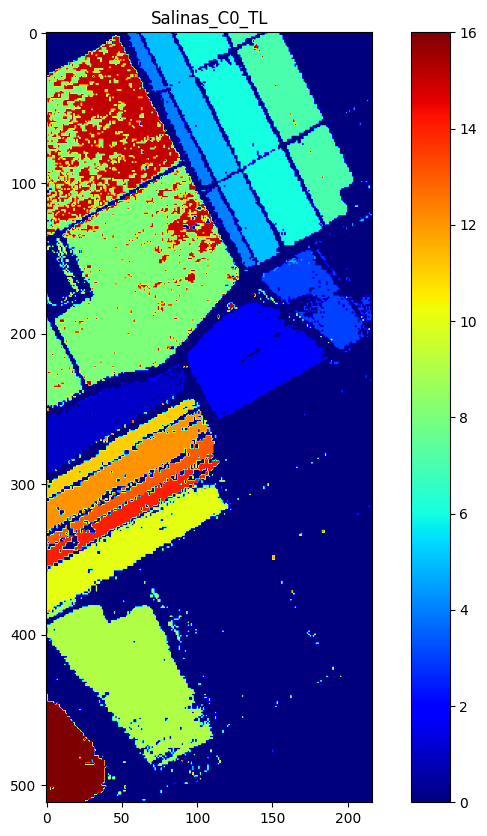

3472/3472 [==============================] - 8s 2ms/step


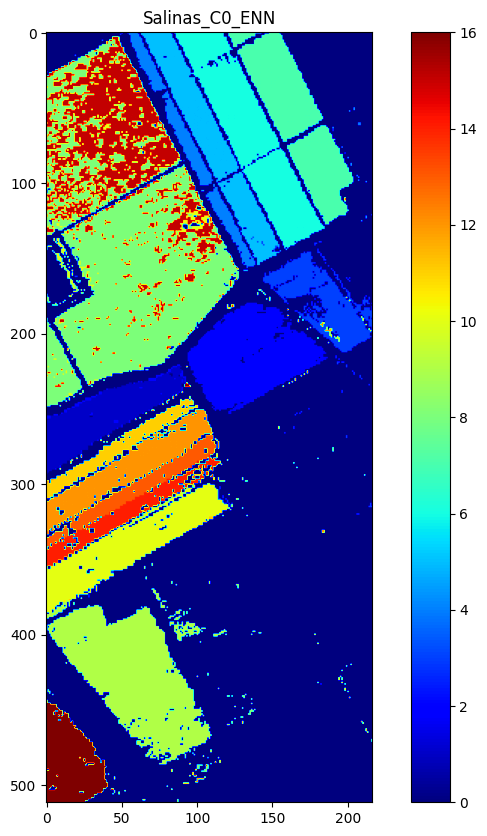

3472/3472 [==============================] - 8s 2ms/step


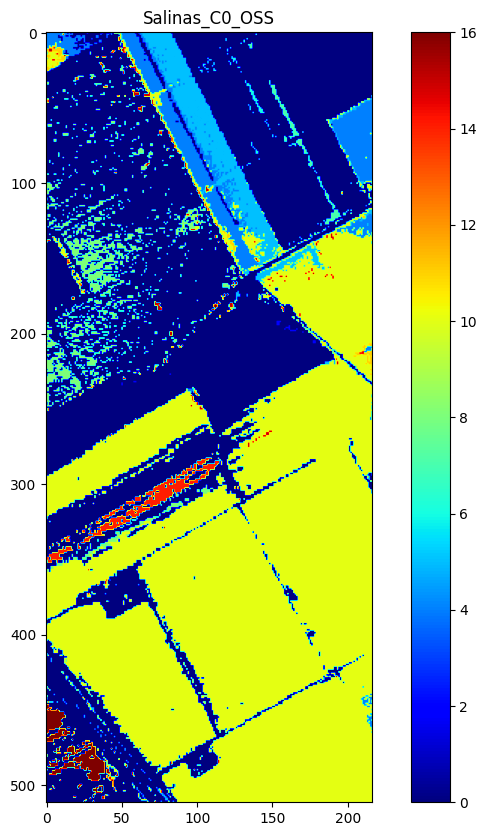

3472/3472 [==============================] - 7s 2ms/step


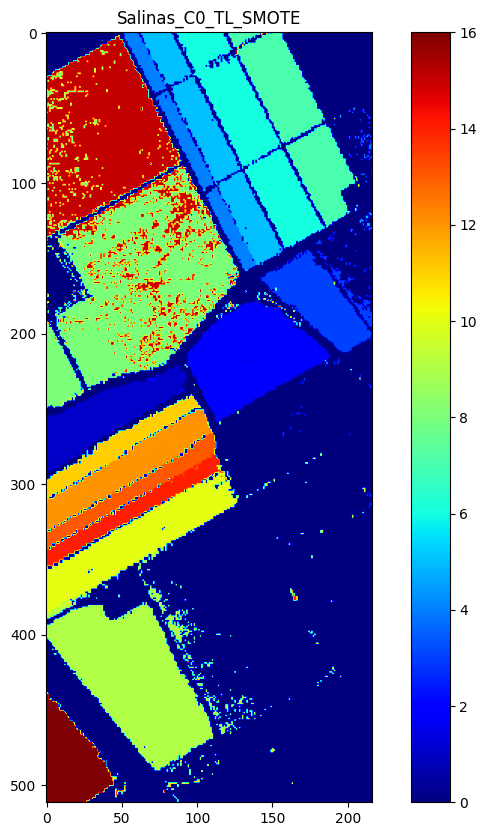

3472/3472 [==============================] - 7s 2ms/step


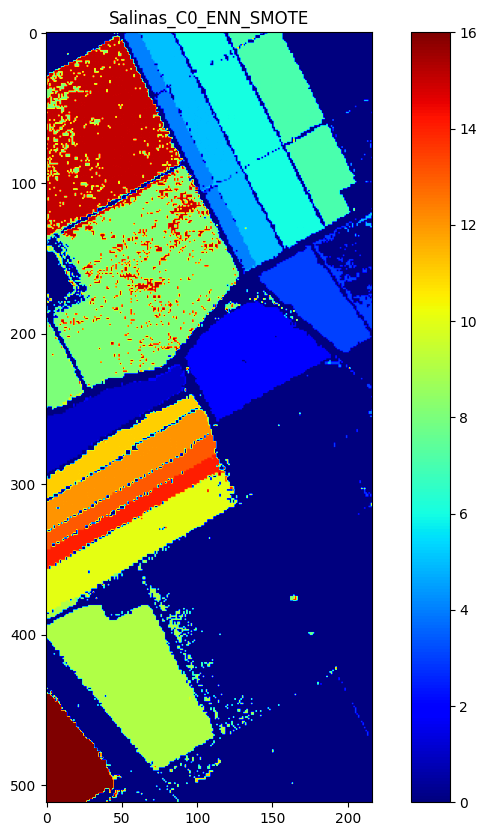

3472/3472 [==============================] - 7s 2ms/step


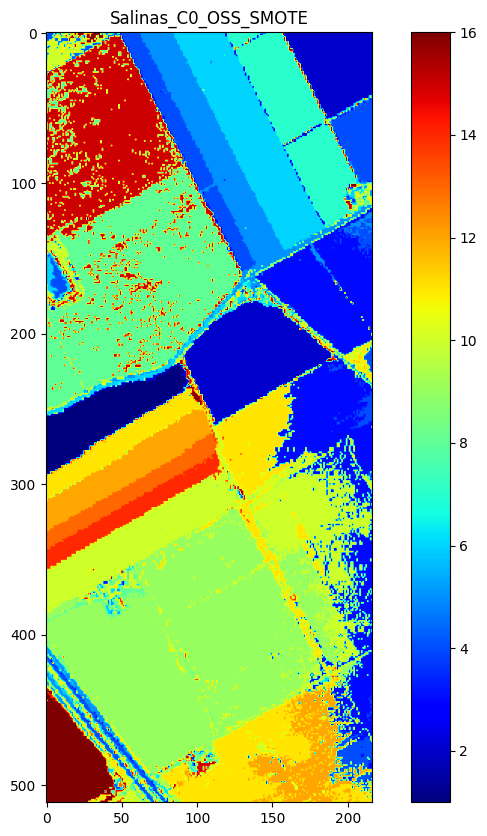

3472/3472 [==============================] - 7s 2ms/step


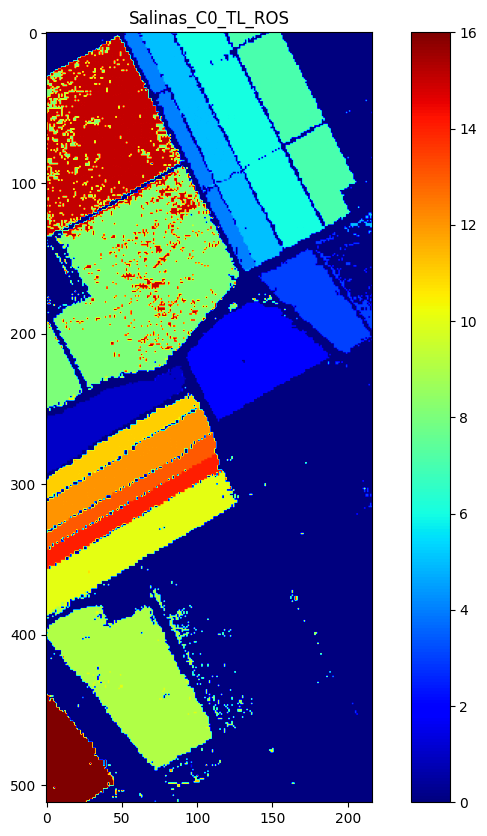

3472/3472 [==============================] - 7s 2ms/step


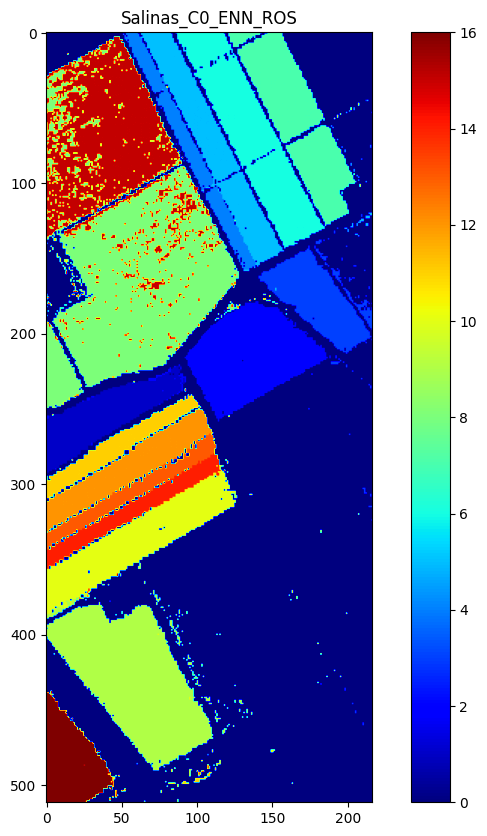

3472/3472 [==============================] - 7s 2ms/step


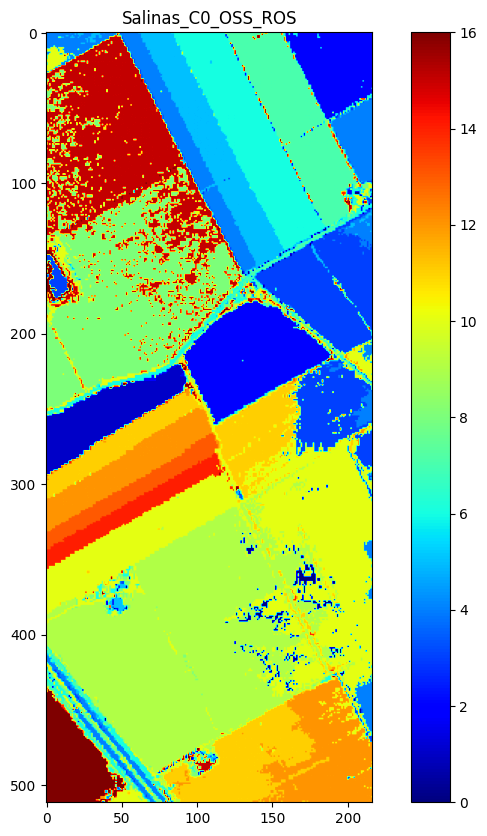

In [11]:
i=0
for model in models:
    # Hacer predicciones en todo el conjunto de datos
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_map = predicted_classes.reshape(resolucion)
    plt.figure(figsize=(10, 10))
    plt.imshow(predicted_map, cmap='jet')
    plt.colorbar()
    nombreModelo=str(modelosArchivos[i].split("/")[3].split(".")[0])
    plt.title(nombreModelo)
    plt.savefig(str("../../resources/"+base+"_"+"TestGrafico_"+nombreModelo  ))
    plt.show()
    i=i+1